In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit import QuantumCircuit, QuantumRegister, assemble, Aer, transpile
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [3]:
def Query(a, b, c, d, e):
    Query = ((not c or (d and (not e)))and a and b)
    if Query == True:
        Query = 1.0
    else :
        Query = 0.0
    return Query

n = 5
interpret = int(np.sqrt(n))

In [4]:
#Creating a matrix that marks the required elements
matrix = np.eye(32,32)    
for a in [0,1]:
    for b in [0,1]:
        for c in [0,1]:
            for d in [0,1]:
                for e in [0,1]:
                    z = (2**4)*a + (2**3)*b + (2**2)*c + (2**1)*d + e
                    k = Query(a,b,c,d,e)
                    if k == 1.0:
                        matrix[z,z] = -1.0
                    else:
                        matrix[z,z] = 1.0
print(matrix)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]


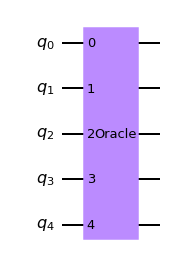

In [5]:
#Creating Oracle
oracle = QuantumCircuit(5, name = "Oracle")
oracle.unitary(matrix, [0,1,2,3,4], label="Oracle")
oracle.draw()

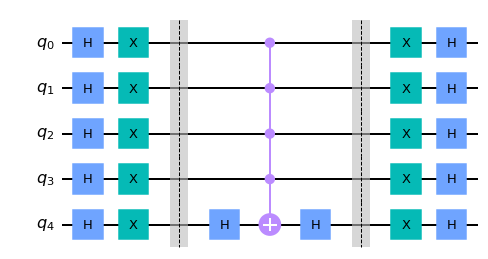

In [6]:
#Creating Diffuser
reflec = QuantumCircuit(5, name = "Diffuser")
reflec.h([0,1,2,3,4])
reflec.x([0,1,2,3,4])
reflec.barrier()
reflec.h(4)
reflec.mct([0,1,2,3],4)
reflec.h(4)
reflec.barrier()
reflec.x([0,1,2,3,4])
reflec.h([0,1,2,3,4])
reflec.draw()

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-82 contains invalid instructions {"gates": {Oracle, Diffuser}} for "statevector" method.


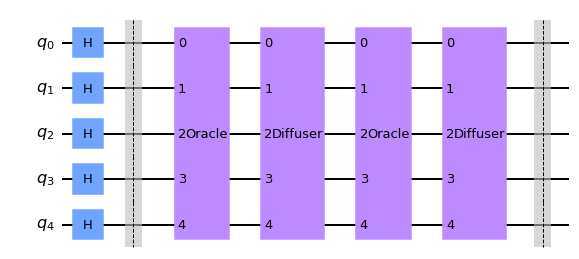

In [7]:
qc = QuantumCircuit(5)
qc.h([0,1,2,3,4])
qc.barrier()
for i in range(interpret):
    qc.append(oracle, [0,1,2,3,4])
    qc.append(reflec, [0,1,2,3,4])
qc.save_statevector()
qobj1 = assemble(qc)
sim = Aer.get_backend('aer_simulator')
result = sim.run(qobj1).result()
qc.draw()

In [10]:
sim = Aer.get_backend('aer_simulator')
qct = transpile(qc, sim)
qobj = assemble(qct)
results = sim.run(qobj).result()
state = results.get_statevector()

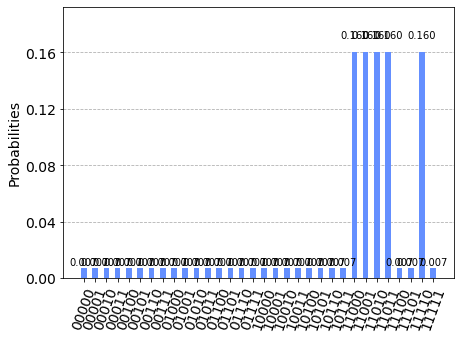

In [11]:
counts = results.get_counts()
plot_histogram(counts)